# Testing qipQST

In [16]:
import qipQST as qst

In [17]:
#testRamp = qst.RampPulse(5, (0, 1), (0, 10), (0, 0))
testConst = qst.ConstantPulse(5, 1, 0, 0)
#testRamp.plotPulse()

In [18]:
testGate = qst.QuantumGate()
#testGate.appendPulse(testRamp)
testGate.appendPulse(testConst)
#testGate.plotPulses()

In [19]:
testCircuit = qst.QuantumCircuit(2)
testCircuit.appendGate(testGate)
#testCircuit.plotCircuitWaveform()

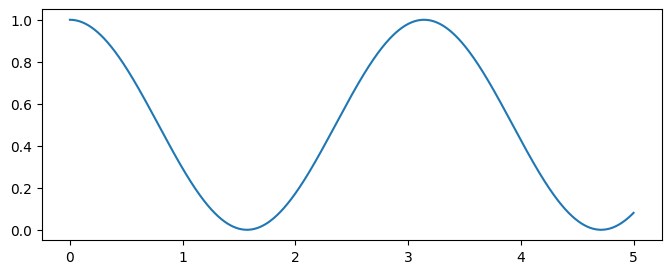

In [20]:
testSimulator = qst.PulseSimulator()
testSimulator.setQubit(qst.Qubit(0))
testSimulator.setCircuit(testCircuit)
testResult = testSimulator.simulateCircuit(1, 10000)
testResult.plotStates()